# Random Forest Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import sklearn
%matplotlib inline

#never print matching warnings
warnings.filterwarnings('ignore') 

#set how pandas displays data
pd.options.display.max_columns = 100
pd.options.display.max_rows = 35
pd.options.display.width = 120

#change the max # of rows pandas will display
pd.options.display.max_rows = 9000

#set to display all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#import seaborn for graphing
import seaborn as sns
sns.set_style('whitegrid')

In [8]:
_='''

PARAMTERES FOR RANDOM FOREST

*** n_estimators : integer, optional (default=10)
    The number of trees in the forest.

criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.
    Note: this parameter is tree-specific.
    
*** max_features : int, float, string or None, optional (default="auto")

*** max_depth : integer or None, optional (default=None)

bootstrap : boolean, optional (default=True) Whether bootstrap samples are used when building trees.

warm_start : bool, optional (default=False)
    When set to ``True``, reuse the solution of the previous call to fit
    and add more estimators to the ensemble, otherwise, just fit a whole
    new forest.
    
min_samples_split : int, float, optional (default=2)
    The minimum number of samples required to split an internal node
    
*** min_impurity_split : float, optional (default=1e-7)
    Threshold for early stopping in tree growth.
    A node will split if impurity > threshold, otherwise it is a leaf.
    
bootstrap : boolean, optional (default=True)

class_weight : dict, list of dicts, "balanced",
    "balanced_subsample" or None, optional (default=None)
    Weights associated with classes in the form ``{class_label: weight}``.
    If not given, all classes are supposed to have weight one. For
    multi-output problems, a list of dicts can be provided in the same
    order as the columns of y.
    
'''

# Load data

In [3]:
path='/Users/juliannefreeman/Desktop/to_share/'
os.chdir(path)
data=pd.read_csv('20180711_datachallenge.csv')
data.head(5)

,id,thickness,unif_cellsize,unif_cellshape,adhesion,cellsize,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# Step 1: replace ? with NaN
data['nuclei']=data['nuclei'].replace('?',np.NaN)

# Step 2: change nuclei into float
data['nuclei']=data['nuclei'].astype(float)

# Step 3: replace nan values with median
data['nuclei'].fillna((data['nuclei'].median()), inplace=True)

# Step 4: remove duplicates
data=data.drop_duplicates(subset='id').reset_index(drop=True) # use default of keeping first instance

# Step 5: binary classification (0 and 1)
def f(data):
    if data==2: return 0
    if data==4: return 1
data['class1']=data['class'].apply(f)

# Evaluate classification between classes

### dependent variables

In [6]:
indvar=[
'thickness' ,     
'unif_cellsize' ,
'unif_cellshape',
'adhesion',
'cellsize',
'nuclei',
'chromatin', 
'nucleoli',
'mitoses'
]  

### independent variables

In [7]:
depvar=['class1']

# Heatmap

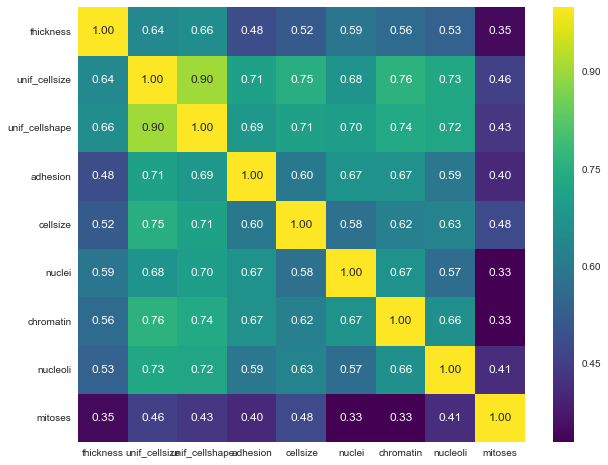

In [8]:
#view correlation of variables
fig, ax1 = plt.subplots(1,1,figsize=(10,8))
_=sns.heatmap(data[indvar].corr(), annot=True, fmt = ".2f", cmap = "viridis", ax=ax1)

# Random Forest

#### prep data

In [9]:
# split data into training and testing sets
print('1. Split data into train and test set\n')
from sklearn.model_selection import train_test_split
X=data[indvar]
y=data[depvar]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Length of train set: \t %f' % len(X_train))
print('Length of test set: \t %f\n' % len(X_test))

# dont scale data
print('2. You dont need to scale data in random forest\n')

# make into correct format
print('3. reshape data')
print('x_train: ', X_train.shape) # X_train must be pandas df
y_train=np.array(y_train).flatten()
print('y_train: ', y_train.shape) # Y_train must be nparray with shape (R,)

1. Split data into train and test set

Length of train set: 	 516.000000
Length of test set: 	 129.000000

2. Do not need to scale data

3. reshape data
x_train:  (516, 9)
y_train:  (516,)


## FIT MODEL

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## VALIDATE MODEL

Validate model

Accuracy: 0.976744

Performance

             precision    recall  f1-score   support

          0       0.99      0.98      0.98        86
          1       0.95      0.98      0.97        43

avg / total       0.98      0.98      0.98       129

Confusion Matrix



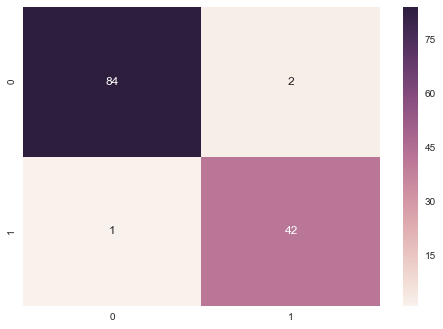

In [11]:
# validate model
print('Validate model\n')
ytest_true, ytest_pred = np.asarray(y_test), random_forest.predict(X_test)
ytest_true= [x for xs in np.array(ytest_true) for x in xs]
ytest_true_prob, ytest_pred_prob = y_test, random_forest.predict_proba(X_test)[:, 1] # take pred of being 1

# accuracy
print('Accuracy: %f\n' % random_forest.score(X_test, y_test))

# classification report
print('Performance\n')
from sklearn.metrics import classification_report
print(classification_report(ytest_true, ytest_pred))

# confusion matrix
print('Confusion Matrix\n')
from sklearn.metrics import confusion_matrix
_=cm=confusion_matrix(ytest_true, ytest_pred)
_=sns.heatmap(cm,annot=True,fmt="d")

In [13]:
ytest_pred_prob

array([0. , 1. , 1. , 0.9, 1. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ,
       1. , 0. , 1. , 1. , 0. , 1. , 1. , 0.9, 0.8, 0. , 0. , 0. , 0. ,
       0.1, 0. , 0. , 0. , 1. , 1. , 0. , 1. , 0. , 0. , 1. , 0. , 0. ,
       0. , 0.9, 0. , 1. , 0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. ,
       1. , 0. , 0.8, 0. , 0.2, 0. , 0. , 1. , 0. , 0.6, 0.6, 0. , 1. ,
       0. , 1. , 1. , 0. , 1. , 0.1, 0.7, 0. , 0. , 0. , 0. , 0. , 0. ,
       1. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 1. , 0. , 0. , 0. ,
       1. , 0.8, 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.3, 0. , 0. , 0. , 1. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.8, 0. , 0. , 0.8, 0. , 0. , 1. , 0. , 1. , 1. ])

the ytest_true is type:  <class 'list'>
the ytest_true is type:  <class 'list'>


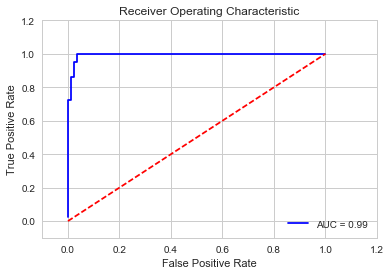

In [126]:
# prep data for roc
ytest_true_roc= [x for xs in np.array(ytest_true_prob) for x in xs] #plot probabilities
print('the ytest_true is type: ', type(ytest_true_roc))
ytest_pred_roc = list(ytest_pred_prob)
print('the ytest_true is type: ', type(ytest_pred_roc))

# calculate false pos rate, true pos rate
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest_true_roc, ytest_pred_roc)
roc_auc = auc(false_positive_rate, true_positive_rate)

# plot roc
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### view feature importance

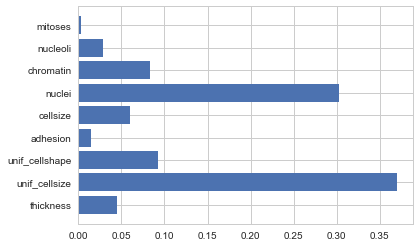

In [104]:
# view feature importance
def f_importances(coef, names):
    plt.barh(range(len(names)), coef, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
f_importances(random_forest.feature_importances_, indvar)

### view trees that were generated in random forest

In [105]:
#from sklearn.tree import export_graphviz
print('Num of trees in forest: ', len(random_forest.estimators_))
for i in range(len(random_forest.estimators_)):
    random_forest.estimators_[i]

Num of trees in forest:  14


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1247235870, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1517025161, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=806800640, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=982358119, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1288135054, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1147971250, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1466332081, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1837765535, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=279904383, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1821210167, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2097588260, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1644745933, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=913828294, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=687791128, splitter='best')

### cannot visualize a tree of a random forest using graphviz

In [26]:
from sklearn.tree import export_graphviz
tree=random_forest.estimators_[0]
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

AttributeError: 'DecisionTreeClassifier' object has no attribute 'export_graphviz'

# kfolds

In [141]:
# split data into training and testing sets
X=data[indvar]
y=data[depvar]

# dont scale data

# make into correct format
print('X: ', X.shape) # X_train must be pd
y_flat=np.array(y).flatten()
print('y: ', y_flat.shape) # Y_train must be nparray with shape (R,)

1. Split data into train and test set

Length of X: 	 645.000000
Length of y: 	 645.000000

2. Do not need to scale data

3. reshape data

X:  (645, 9)
y:  (645,)


In [138]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=0)
kfolds_model = RandomForestClassifier()
results_acc = model_selection.cross_val_score(kfolds_model, X, y_flat, cv=kfold, scoring='accuracy')
results_f1  = model_selection.cross_val_score(kfolds_model, X, y_flat, cv=kfold, scoring='f1')
results_auc = model_selection.cross_val_score(kfolds_model, X, y_flat, cv=kfold, scoring='roc_auc')

print('\nMean (SD)')
print('where mean = bias and SD = variance \n')
print("accuracy: %f (%f) "  % (results_acc.mean(), results_acc.std()))
print("f1:\t %f (%f) " % (results_f1.mean(), results_f1.std()))
print("roc_auc: %f (%f) " % (results_auc.mean(), results_auc.std()))


Mean (SD)
where mean = bias and SD = variance 

accuracy: 0.952043 (0.034699) 
f1:	 0.946621 (0.065544) 
roc_auc: 0.987848 (0.015553) 


# Save model

In [120]:
import pickle
s = pickle.dumps(random_forest)
random_forest2 = pickle.loads(s)
random_forest2.predict(X)

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,